# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
from astropy.table import QTable, vstack

# Comparing date range of both sets|

## Selecting years only columns

In [2]:
def date_grab(sum_table):
    if 'object_name' in sum_table.colnames:
        # ESA Table
        target_col = sum_table['object_name']
    elif 'fullname' in sum_table.colnames:
        # NASA Table
        target_col = sum_table['fullname']
    else:
        print("Error: Could not find 'object_name' or 'fullname' column.")
        return None

    year_list = []
    
    for name in target_col:
        name_str = str(name).strip()
        match = re.search(r'(19|20)\d{2}', name_str)
        
        if match:
            year_list.append(int(match.group()))
        else:
            year_list.append(-1) 
            
    return year_list

In [3]:
NASA_SENTRY_table_sum = QTable.read('data/nasa_ipcum.ecsv', format='ascii.ecsv')
ESA_table_sum = QTable.read('data/esa_ipcum.ecsv', format='ascii.ecsv')
nasa_year = date_grab(NASA_SENTRY_table_sum)
esa_year = date_grab(ESA_table_sum)

nasa_year_table = QTable()
nasa_year_table['nasa'] = nasa_year
esa_year_table = QTable()
esa_year_table['esa'] = esa_year

## Plotting years hist

In [4]:
# Combined dates
all_year = np.concatenate([nasa_year, esa_year])

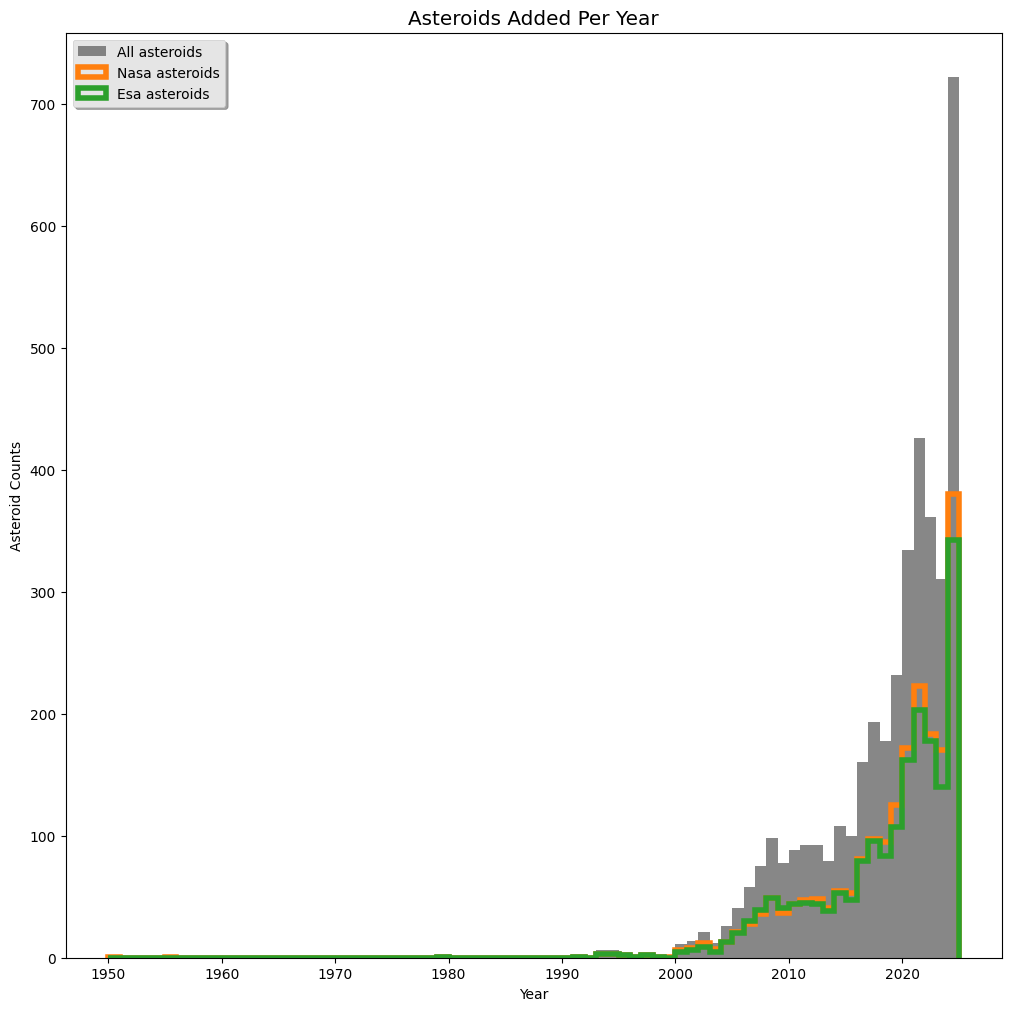

In [5]:
fig, ax = plt.subplots(
    figsize = (10, 10), 
    constrained_layout = True,
)

plt.style.use('ggplot')

# All asteroids
my_bins = np.arange(1950, 2026, 1)

ax.hist(all_year,
           bins = my_bins,
           histtype = 'stepfilled',
           facecolor = 'DimGray',
           alpha = 0.8,
           label = "All asteroids")

# Nasa
ax.hist(nasa_year_table['nasa'],
           bins = my_bins,
           histtype = 'step',
           facecolor = 'blue',
           linewidth = 4,
           label = "Nasa asteroids")
# Esa
ax.hist(esa_year_table['esa'],
           bins = my_bins,
           histtype = 'step',
           facecolor = 'red',
           linewidth = 4,
           label = "Esa asteroids")

ax.set_title("Asteroids Added Per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Asteroid Counts")

ax.legend(loc=0, shadow=True);

### Zoom in (before 2000)

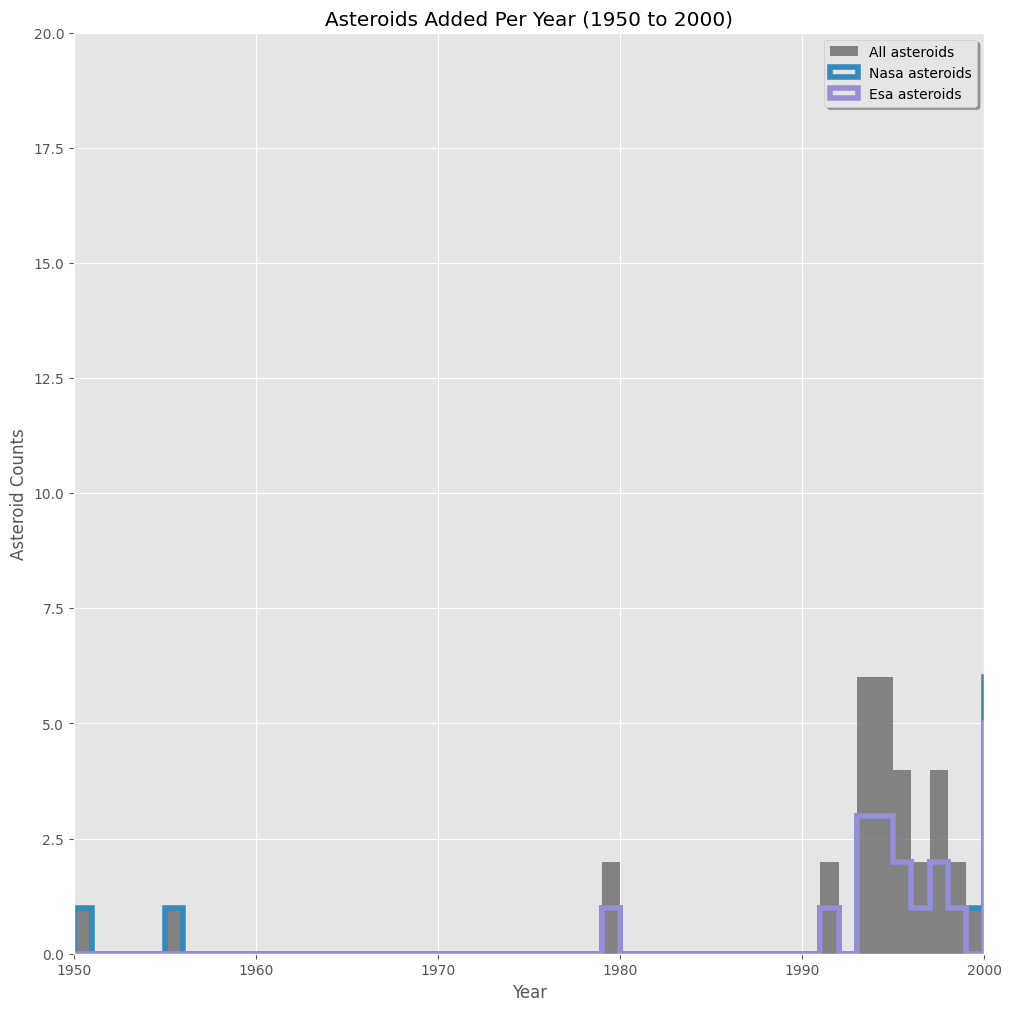

In [6]:
fig, ax = plt.subplots(
    figsize = (10, 10), 
    constrained_layout = True,
)

plt.style.use('ggplot')

# Zoom in to the range 1950 to 2000
ax.set_xlim(1950, 2000)
ax.set_ylim(0, 20)

# All asteroids
my_bins = np.arange(1950, 2026, 1)

ax.hist(all_year,
           bins = my_bins,
           histtype = 'stepfilled',
           facecolor = 'DimGray',
           alpha = 0.8,
           label = "All asteroids")

# Nasa
ax.hist(nasa_year_table['nasa'],
           bins = my_bins,
           histtype = 'step',
           facecolor = 'blue',
           linewidth = 4,
           label = "Nasa asteroids")
# Esa
ax.hist(esa_year_table['esa'],
           bins = my_bins,
           histtype = 'step',
           facecolor = 'red',
           linewidth = 4,
           label = "Esa asteroids")

ax.set_title("Asteroids Added Per Year (1950 to 2000)")
ax.set_xlabel("Year")
ax.set_ylabel("Asteroid Counts")

ax.legend(loc=0, shadow=True);